In [89]:
%matplotlib inline

import itertools
import os 
import librosa
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from collections import OrderedDict

import generate_global_features_2 as ggf
import extract_syllable_duration_4 as esd
import plots as my_plots

from matplotlib.legend_handler import HandlerLine2D

from matplotlib.backends.backend_pdf import PdfPages

#from extract_syllable_duration_4 import autodetec, dilate_both_and

importlib.reload(util)
importlib.reload(ggf)
importlib.reload(esd)
importlib.reload(my_plots)


<module 'plots' from '/var/tmp/ff/tcc/code/plots.py'>

In [15]:
PICS_DIR = util.PICS_DIR + '/'
print(PICS_DIR)

/Users/felipefelix/USP/tcc/pics/


389500


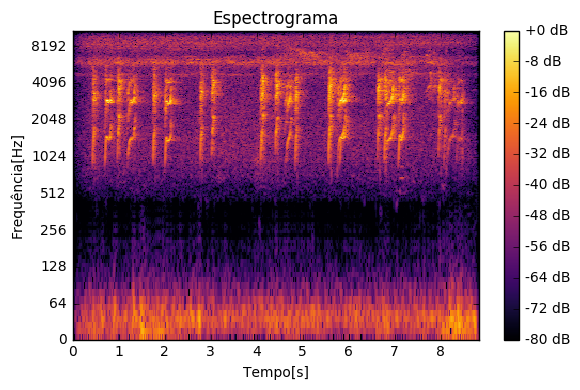

In [6]:
y, sr = librosa.load('../dataset/pr_article/S_A_C_Base_Parte-1/Automolus leucophthalmus/song/100066.mp3') 
D = librosa.stft(y)
print(np.size(D))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', cmap = 'inferno')
plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
plt.colorbar(format='%+2.0f dB')
plot1 = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectro.pdf')
pp.savefig(plot1)
pp.close()

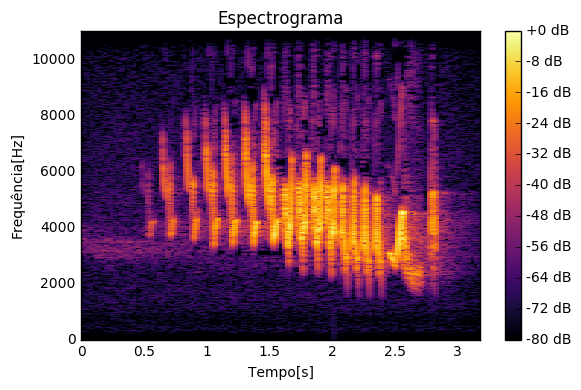

In [9]:
y, sr = librosa.load('../dataset/monografia/exemploFringilla coelebs.mp3')

D = librosa.stft(y[20000:90000])

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
plt.colorbar(format='%+2.0f dB')
plot1 = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectro_hierarquia.pdf')
pp.savefig(plot1)
pp.close()

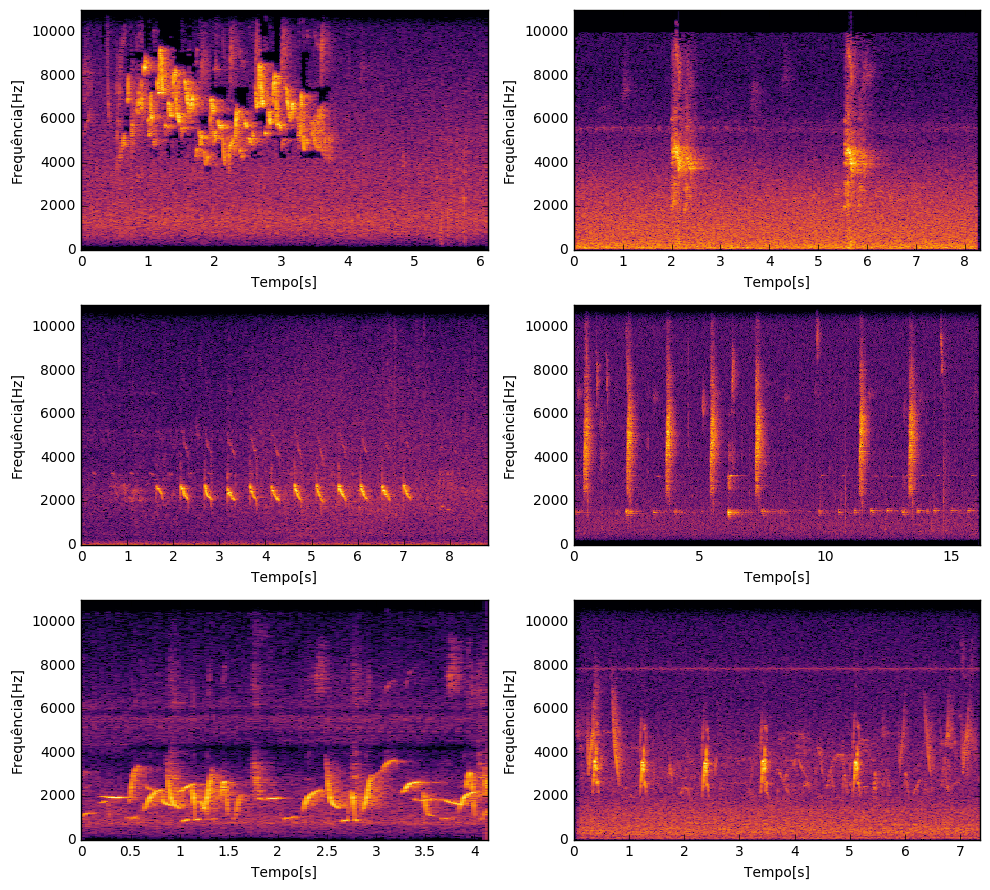

In [11]:
y1, sr1 = librosa.load('../dataset/monografia/XC112925 - Ochraceous Wren - Troglodytes ochraceus.mp3')
y2, sr2 = librosa.load('../dataset/monografia/XC223128 - Narrow-billed Antwren - Formicivora iheringi.mp3')
y3, sr3 = librosa.load('../dataset/monografia/XC261074 - Whiskered Wren - Pheugopedius mystacalis mystacalis.mp3')
y4, sr4 = librosa.load('../dataset/monografia/Call_Brotogeris_tirica_PNT_180605.mp3')
y5, sr5 = librosa.load('../dataset/monografia/Call_Cichlocolaptes leucophrus.mp3')
y6, sr6 = librosa.load('../dataset/monografia/Call_Myiophobus%20fasciatus.mp3')


D1 = librosa.stft(y1[:int(len(y1)/3)])
D2 = librosa.stft(y2[2000:int(len(y2)/8)])
D3 = librosa.stft(y3[40000:int(len(y3)/2)])
D4 = librosa.stft(y4[:int(len(y4)/1)])
D5 = librosa.stft(y5[:int(len(y5)/1)])
D6 = librosa.stft(y6[:int(len(y6)/1)])

fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(321)
librosa.display.specshow(librosa.amplitude_to_db(D1, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
#plt.colorbar(format='%+2.0f dB')


ax2 = fig.add_subplot(323)
librosa.display.specshow(librosa.amplitude_to_db(D2, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
#plt.colorbar(format='%+2.0f dB')

ax3 = fig.add_subplot(325)
librosa.display.specshow(librosa.amplitude_to_db(D3, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')

#plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
#plt.colorbar(format='%+2.0f dB')


ax4 = fig.add_subplot(322)
librosa.display.specshow(librosa.amplitude_to_db(D4, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
#plt.colorbar(format='%+2.0f dB')


ax5 = fig.add_subplot(324)
librosa.display.specshow(librosa.amplitude_to_db(D5, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
#plt.colorbar(format='%+2.0f dB')

ax6 = fig.add_subplot(326)
librosa.display.specshow(librosa.amplitude_to_db(D6, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')

#plt.title('Espectrograma')
plt.xlabel('Tempo[s]')
plt.ylabel('Frequência[Hz]')
#plt.colorbar(format='%+2.0f dB')


plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectros_cantos_chamadas.pdf')
pp.savefig(plot)
pp.close()

In [26]:
y, sr = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/experimentos_100/Trogon surrucura/song/10098-2.wav.filtered1.wav')
D = librosa.stft(y)


In [27]:
y_new = esd.autodetec(y, 2, 0.2, 'signal')

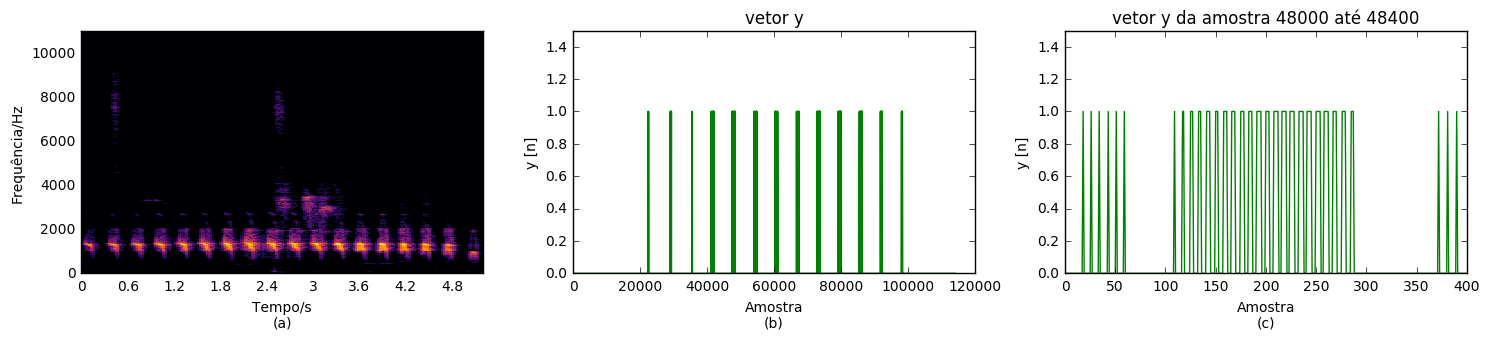

In [28]:

# zoom
# plt.plot(y_new[48000:48400], 'g')
fig = plt.figure(figsize=(15,3.5))
ax = fig.add_subplot(131)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s\n(a)')
plt.ylabel('Frequência/Hz')

ax = fig.add_subplot(132)
plt.ylim([0,1.5])
plt.plot(y_new, 'g')
plt.title('vetor y')
plt.xlabel('Amostra\n(b)')
plt.ylabel('y [n]')

ax = fig.add_subplot(133)
plt.ylim([0,1.5])
plt.plot(y_new[48000:48400], 'g')
plt.title('vetor y da amostra 48000 até 48400')
plt.xlabel('Amostra\n(c)')
plt.ylabel('y [n]')

plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'vetor_y_com_y_zoom.pdf')
pp.savefig(plot)
pp.close()

In [29]:
y_d = esd.dilate_both_and(y_new)

In [30]:
def filter_in_y(y_d, min_dur):
    y = y_d.copy()
    durations = []
    N = len(y)
    i = 0
    init = 0
    end = 0
    syllable = y[0] == 1

    while (i < N):
        if (y[i] == 1 and not syllable):
            init = i
            syllable = True
        if (y[i] == 0 and syllable):
            end = i - 1
            if end - init < min_dur:
                #print("aqui")
                #print("init: {}, end: {}".format(init, end))
                y[init:end+1] = 0
            else:
                durations += [end - init]
            syllable = False
        i += 1
    print("<- durations_syllable")
    return y


In [31]:
y_f = filter_in_y(y_d, 600)

<- durations_syllable


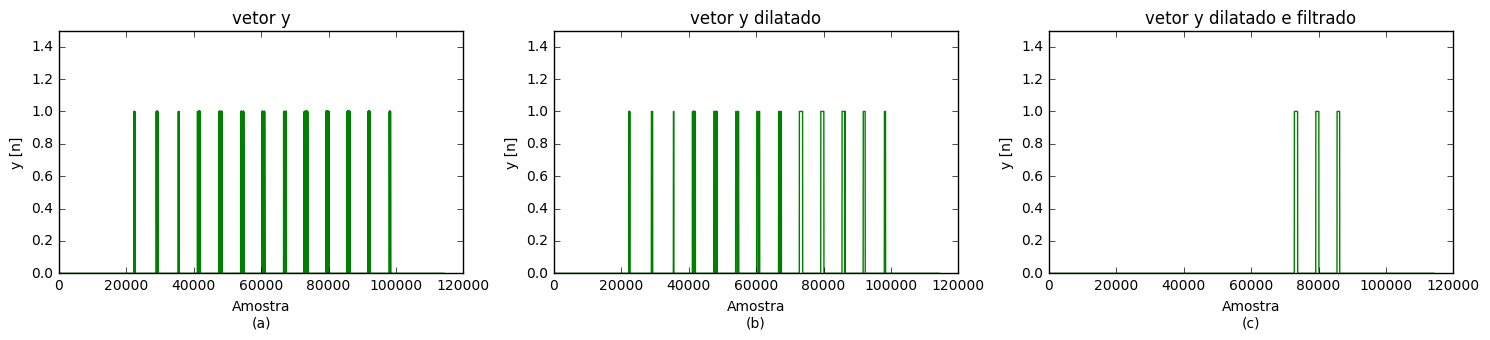

In [32]:

# zoom
# plt.plot(y_new[48000:48400], 'g')
fig = plt.figure(figsize=(15,3.5))
ax = fig.add_subplot(131)
plt.ylim([0,1.5])
plt.plot(y_new, 'g')
plt.title('vetor y')
plt.xlabel('Amostra\n(a)')
plt.ylabel('y [n]')

ax = fig.add_subplot(132)
plt.ylim([0,1.5])
plt.plot(y_d, 'g')
plt.title('vetor y dilatado')
plt.xlabel('Amostra\n(b)')
plt.ylabel('y [n]')

ax = fig.add_subplot(133)
plt.ylim([0,1.5])
plt.plot(y_f, 'g')
plt.title('vetor y dilatado e filtrado')
plt.xlabel('Amostra\n(c)')
plt.ylabel('y [n]')

plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'vetor_y_com_y_dilatado.pdf')
pp.savefig(plot)
pp.close()

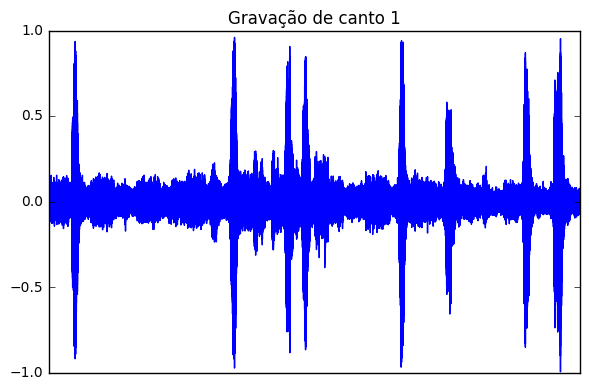

In [59]:
y, sr = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000481.mp3')

plt.xticks([])
plt.title('Gravação de canto 1')
plt.plot(y)
plot = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'gravacao1.pdf')
pp.savefig(plot)
pp.close()

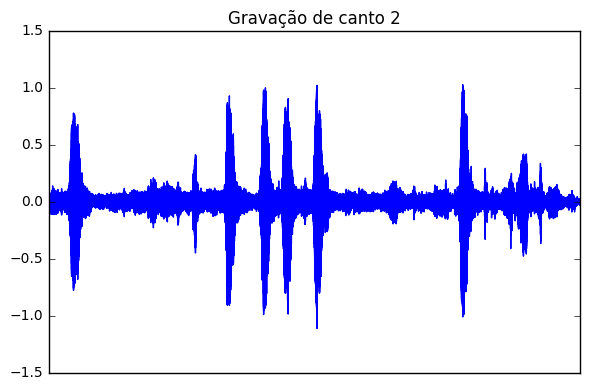

In [60]:
y1, sr1 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000482.mp3')

plt.xticks([])
plt.title('Gravação de canto 2')
plt.plot(y1)
plot = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'gravacao2.pdf')
pp.savefig(plot)
pp.close()

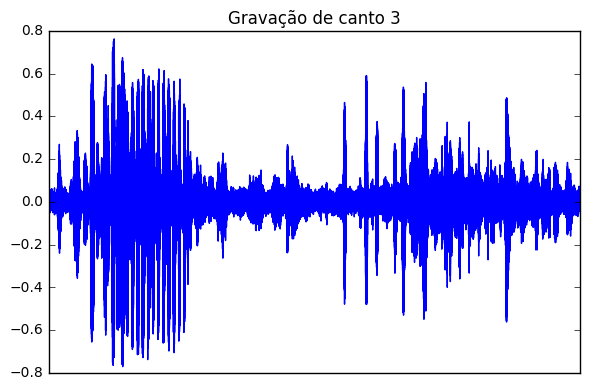

In [61]:
y2, sr2 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000483.mp3')

plt.xticks([])
plt.title('Gravação de canto 3')
plt.plot(y2)
plot = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'gravacao3.pdf')
pp.savefig(plot)
pp.close()

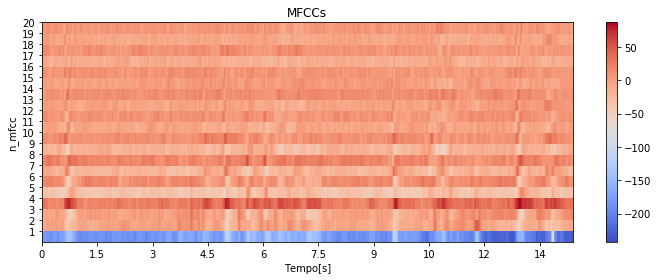

In [59]:
y, sr = librosa.load('../dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000481.mp3')

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Tempo[s]')
plt.ylabel('n_mfcc')
plt.yticks(np.arange(1,21))

plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_MFCC.pdf')
pp.savefig(plot)
pp.close()

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


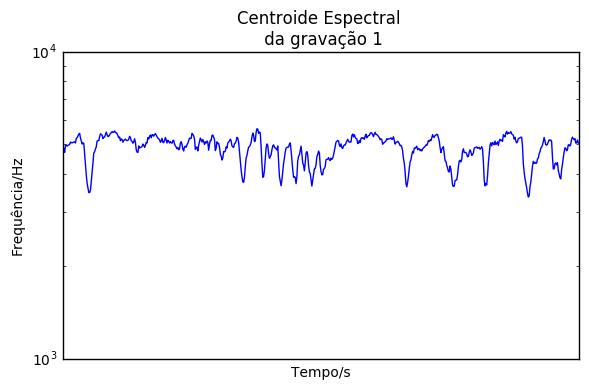

In [57]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.semilogy(cent.T)
plt.title('Centroide Espectral \n da gravação 1')
plt.ylabel('Frequência/Hz')
plt.xlabel('Tempo/s')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
pp.savefig(plot)
pp.close()

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


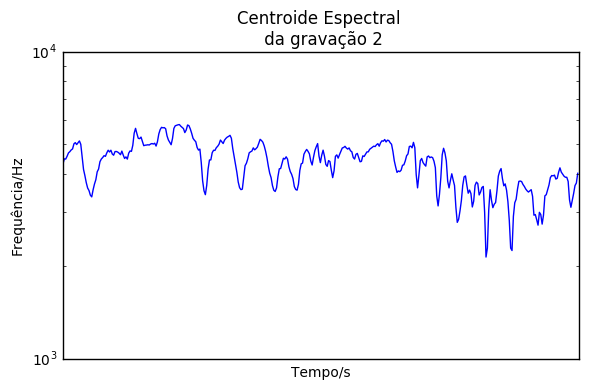

In [56]:
cent = librosa.feature.spectral_centroid(y=y1, sr=sr1)
plt.semilogy(cent.T)
plt.title('Centroide Espectral \n da gravação 2')
plt.ylabel('Frequência/Hz')
plt.xlabel('Tempo/s')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_CS2.pdf')
pp.savefig(plot)
pp.close()

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


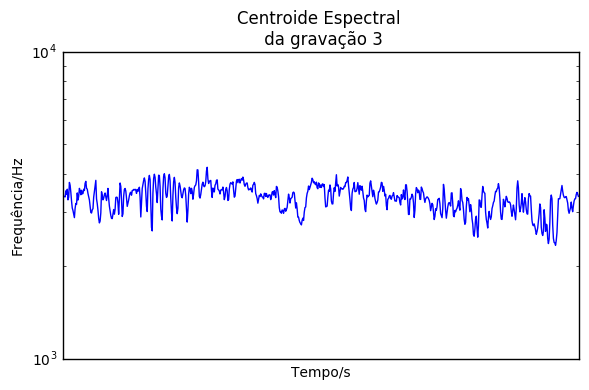

In [55]:
cent = librosa.feature.spectral_centroid(y=y2, sr=sr2)
plt.semilogy(cent.T)
plt.title('Centroide Espectral \n da gravação 3')
plt.ylabel('Frequência/Hz')
plt.xlabel('Tempo/s')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_CS3.pdf')
pp.savefig(plot)
pp.close()

In [27]:
#print(util.EXPERIMENTS_DIR+'/hashes/1.txt')
a = open(util.EXPERIMENTS_DIR+'/hashes/1.txt')
hashes = []
for l in a.readlines():
    if l != '\n':
        hashes.append(eval(l))


In [26]:
def lists_from_dicts(dicts):
    res = {}
    while len(dicts) > 0:
        lines = []
        ds = []
        current = dicts[0]

        for d in dicts:
            if d['dirs'] == current['dirs'] and d['version'] == current['version'] and d['num_exp'] == current['num_exp']:
                ds.append(d)

        for d in ds:
            dicts.remove(d)
            lines.append([d['version'], d['n_species'], d['feat'], d['knn'], d['gnb'], d['svm']])
        print(lines)        

In [333]:
importlib.reload(my_plots)

def line_plot_data_max(data_all, n_lin, n_col, title_global, titles, xlabel, ylabel, legend, xticks, dict_markers, axis):
    fig = plt.figure(figsize=(15*n_lin, 7.5*n_col))
    fig.suptitle(title_global, fontsize = 30, y = 1.05)
    markers=['o','X','D','8','p','*','+','8','+','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
    colors = ['r', 'g', 'b', 'c', 'm', 'y','k']
    m_i = 0
    f_i = 0
    c_i = 0
    classifier = np.argmax(data_all[0], axis=axis).flatten('F')
    data_all[0] = np.max(data_all[0], axis=axis)
    #classifier = [0,1,2]*100
    cl = dict_markers
    atr=[]
    
    for i in range(n_lin):
        for j in range(n_col):
            n_fig = i * n_col + (j + 1)
            data = data_all[n_fig -1 ]
            ax = plt.subplot(n_lin, n_col, n_fig)
            ax.set_ylim((np.min(data)-0.01, np.max(data)+0.01))
            
            for c in cl:
                p2, = ax.plot(0, 0, marker=markers[c], markersize=12, color='k', alpha=0.4)
                p2.set_label(cl[c])
                h, l = ax.get_legend_handles_labels()
                by_label = OrderedDict(zip(l, h))
                ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5), numpoints=1)
                    

            #print("data \n {}".format(data))
            #print("data.T \n {}".format(data.T))
            for d in data.T:
                #print("d \n {}".format(d))
                N = len(d)
                for i in range(N):
                    #print("c_i: {} feat: {} valor: {} marker: {} color: {}".format(c_i, util.FEATURES_PLOT[f_i], d[i], classifier[c_i], colors[m_i]))
                    p1, = ax.plot(i, d[i], marker=markers[classifier[c_i]], markersize=15,color=colors[m_i], alpha=.3)                    
                    if i != N-1:
                        line, = ax.plot([i, i+1], [d[i], d[i+1]], color=colors[m_i])
                        line.set_label(legend[f_i])
                    h, l = ax.get_legend_handles_labels()
                    by_label = OrderedDict(zip(l, h))
                    ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5), numpoints=1)
                    c_i += 1
                f_i += 1
                m_i += 1
            
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.xticks(np.arange(0,len(xticks),1),xticks)
            plt.title("{}".format(titles[n_fig - 1]))
    fig.tight_layout()

def max_f_per_version(all_data):
    data_f = []
    for data in all_data:
        data_f.append(np.max(data,axis=1))
    data_f = np.array(data_f)
    return data_f

def line_plot_max(all_data, title):
    line_plot_data_max([all_data], 1, 1, title,['max(f-measure) por versão/feat'], 'Versão filtrada', 'F-measure', util.FEATURES_PLOT, ['no filter', 'filter1', 'filter2', 'filter3'],{0:'kNN', 1:'NB', 2:'SVM'}, 2)

def line_plot_max_v_c(all_data, title):
    line_plot_data_max([all_data], 1, 1, title,['max(f-measure) por versão/classificador'], 'Versão filtrada', 'F-measure', util.CLASSIFIERS, ['no filter', 'filter1', 'filter2', 'filter3'],{0:'rmse', 1:'mfcc', 2:'spec_band', 3:'spec_cent', 4:'spec_roll', 5:'syllable_dur', 6:'zcr'},1 )


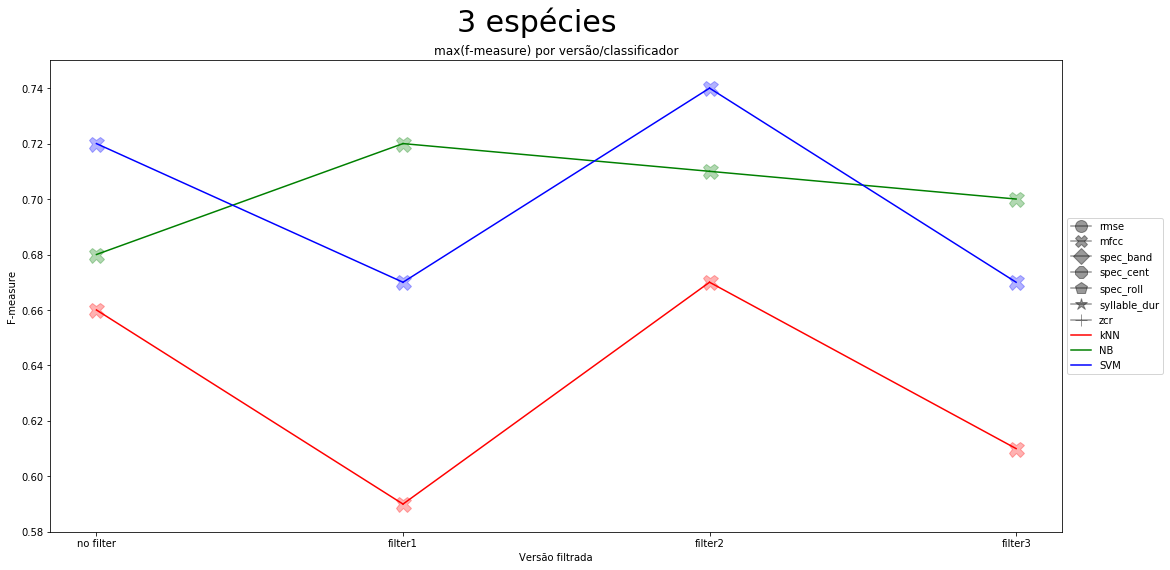

In [334]:
all_data3 = my_plots.matrix_from_table('../experiments/hashes/3spc')
#my_plots.plot_all(all_data3, '3 espécies')
#line_plot_data(all_data3, 2, 2, '3 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )
#print(all_data3)
#print(np.max(all_data3, axis=1))
#print(np.argmax(all_data3, axis=1))
#print(np.argmax(all_data3, axis=1).flatten('F'))
#print(np.argmax(all_data3, axis=1).T)
line_plot_max_v_c(all_data3, '3 espécies')

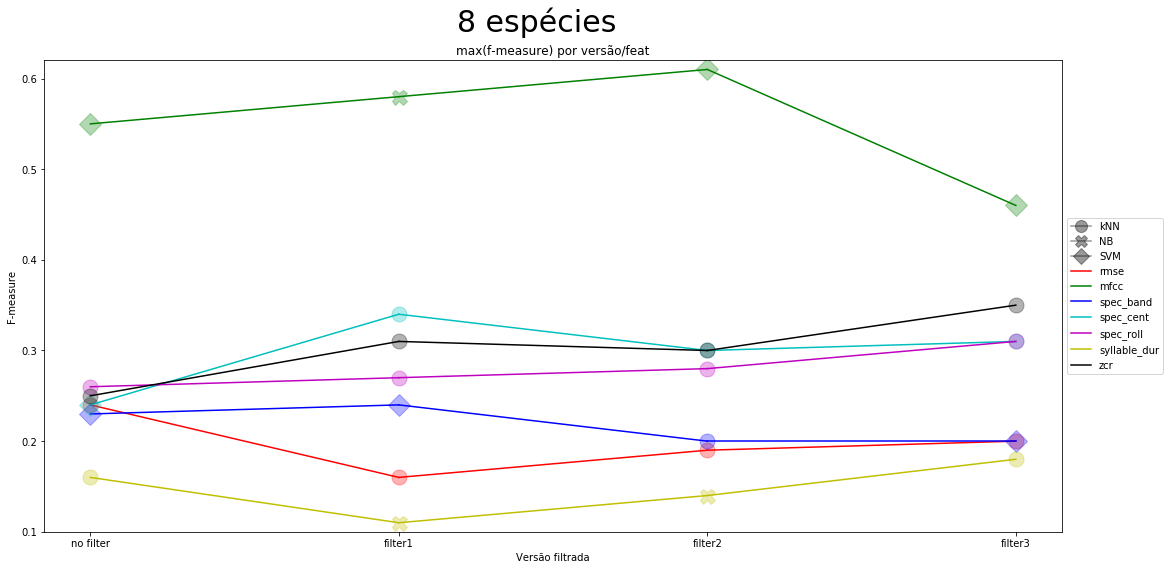

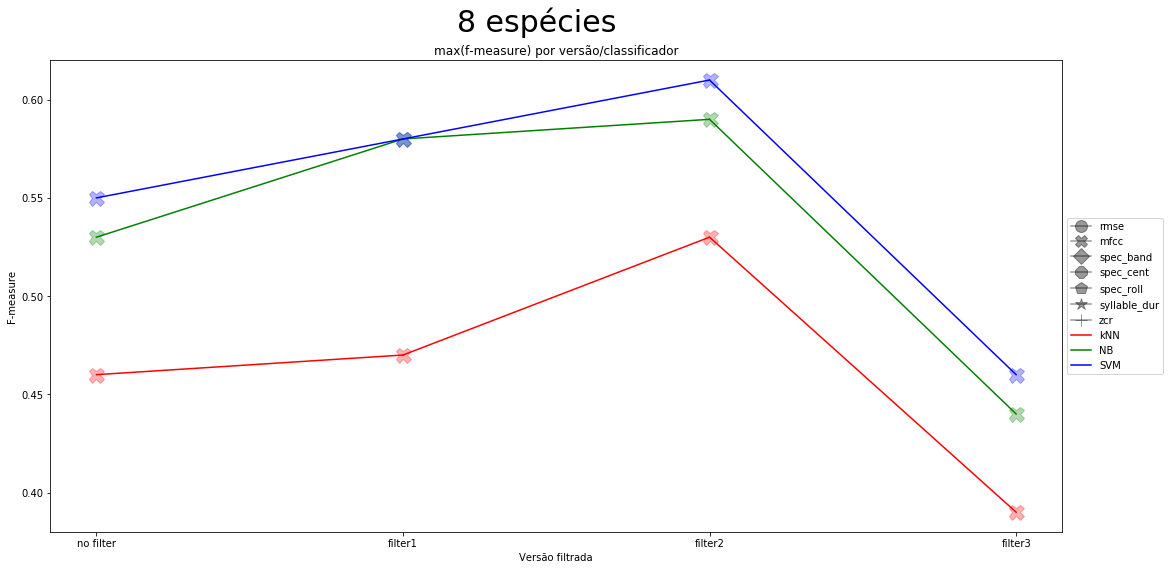

In [313]:
all_data3 = my_plots.matrix_from_table('../experiments/hashes/8spc')
#my_plots.plot_all(all_data3, '3 espécies')
#line_plot_data(all_data3, 2, 2, '3 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )
#print(np.max(all_data3, axis=2))
#print(np.argmax(all_data3, axis=2))
#print(np.argmax(all_data3, axis=2).flatten('F'))
#print(np.argmax(all_data3, axis=2).T)
line_plot_max(all_data3, '8 espécies')
line_plot_max_v_c(all_data3, '8 espécies')

In [10]:
print("{} {}".format(np.min(all_data3), np.max(all_data3)))
print("{} {}".format(np.min(all_data5), np.max(all_data5)))
print("{} {}".format(np.min(all_data8), np.max(all_data8)))
print("{} {}".format(np.min(all_data12), np.max(all_data12)))
print("{} {}".format(np.min(all_data20), np.max(all_data20)))

0.21 0.74
0.1 0.66
0.05 0.61
0.03 0.54
0.01 0.54


In [74]:
PICS_DIR = '../pics/'

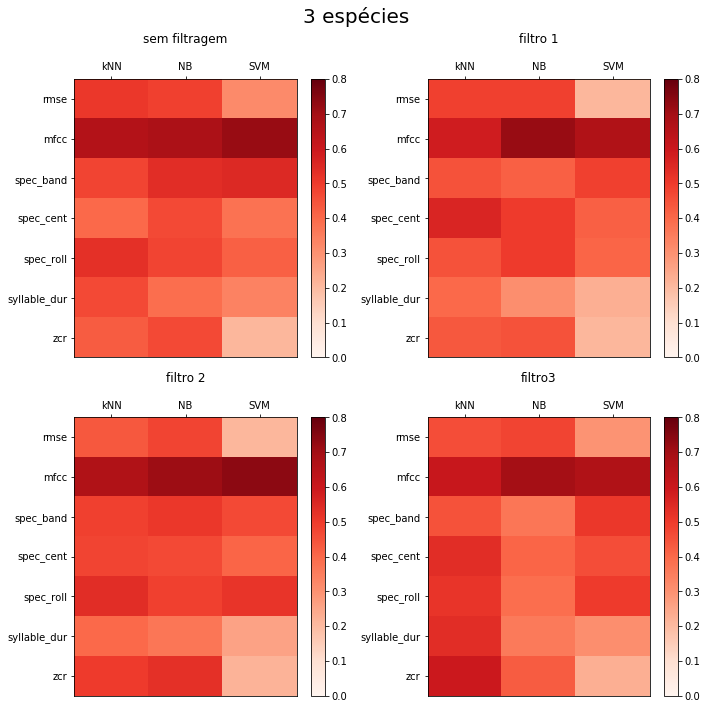

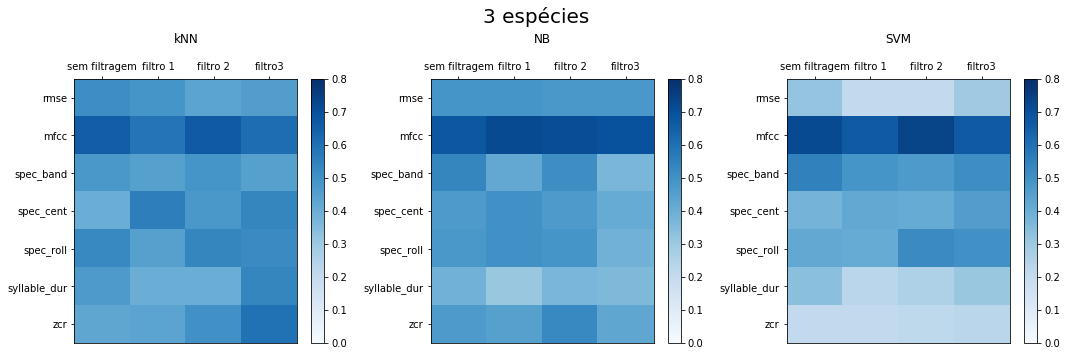

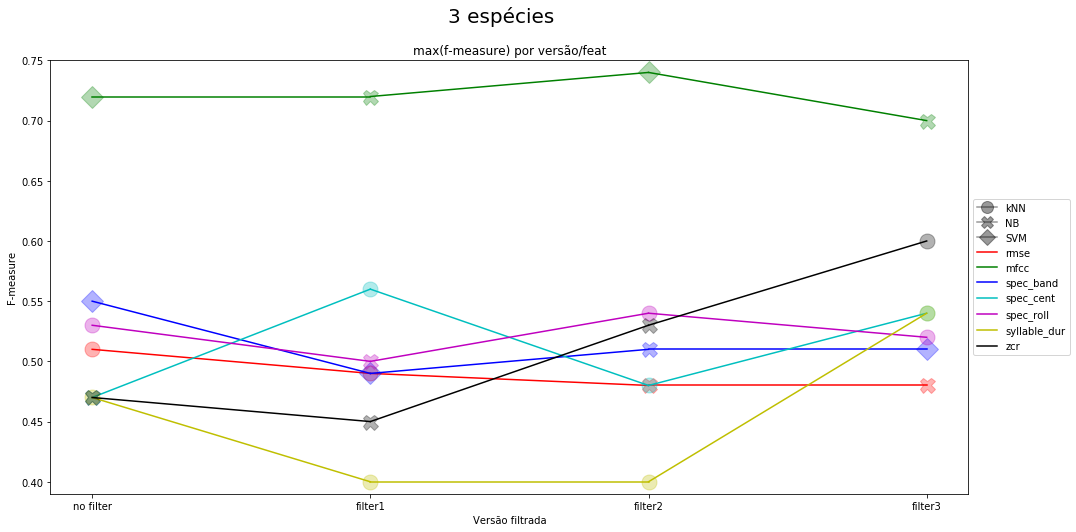

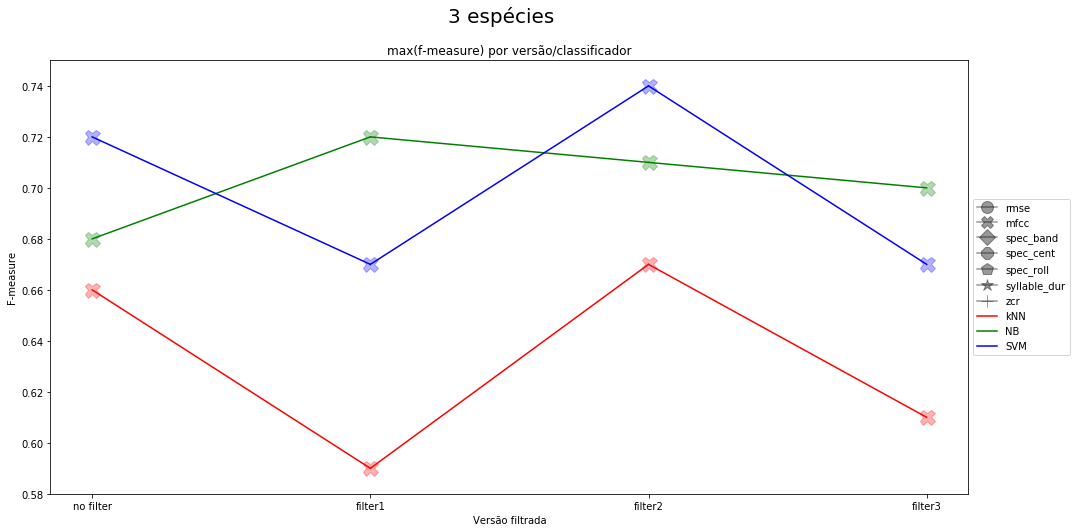

In [63]:
importlib.reload(my_plots)
all_data3 = my_plots.matrix_from_table('../experiments/hashes/3spc')
title = '3 espécies'

plot = my_plots.color_plot_data_f_c(all_data3,title)

pp = PdfPages(PICS_DIR + 'geral3c.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.color_plot_data_f_v(all_data3,title)

pp = PdfPages(PICS_DIR + 'geral3f.pdf')
pp.savefig(plot)
pp.close()

#plot = my_plots.line_plot_data(all_data3, 2, 2, title,['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

#pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
#pp.savefig(plot)
#pp.close()

plot = my_plots.line_plot_max(all_data3, title)

pp = PdfPages(PICS_DIR + '3maxvf.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.line_plot_max_v_c(all_data3, title)

pp = PdfPages(PICS_DIR + '3maxvc.pdf')
pp.savefig(plot)
pp.close()


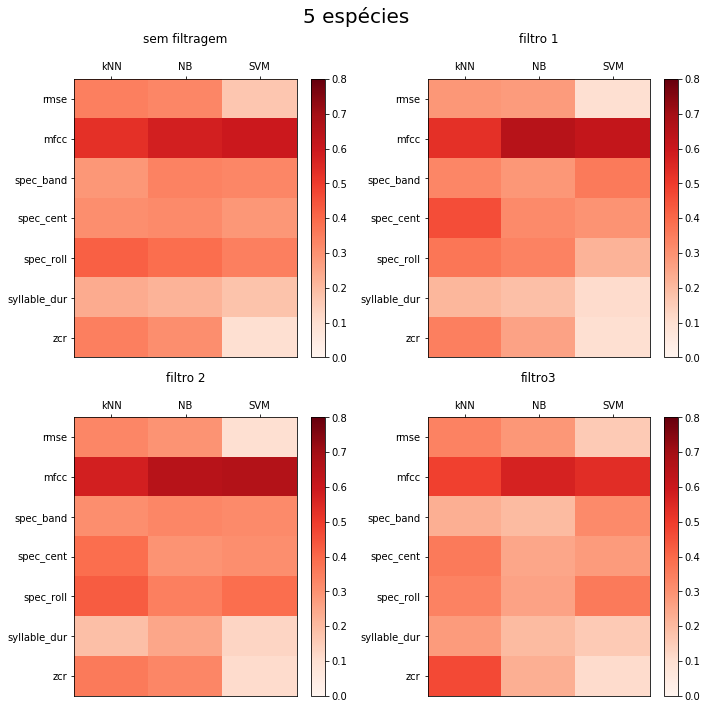

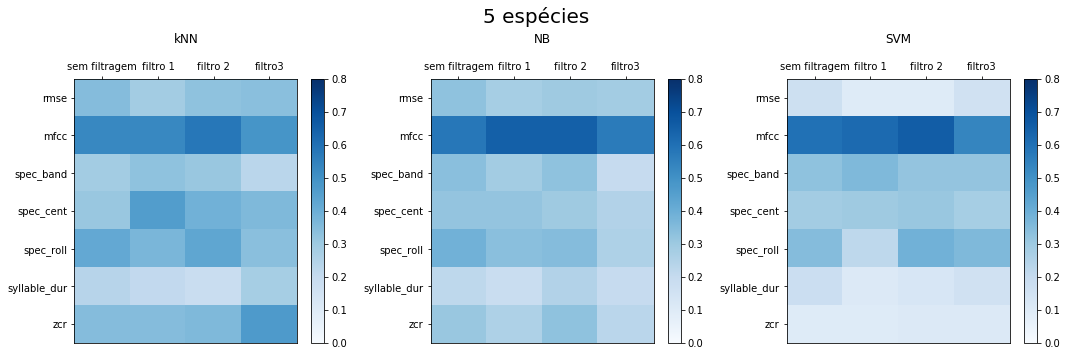

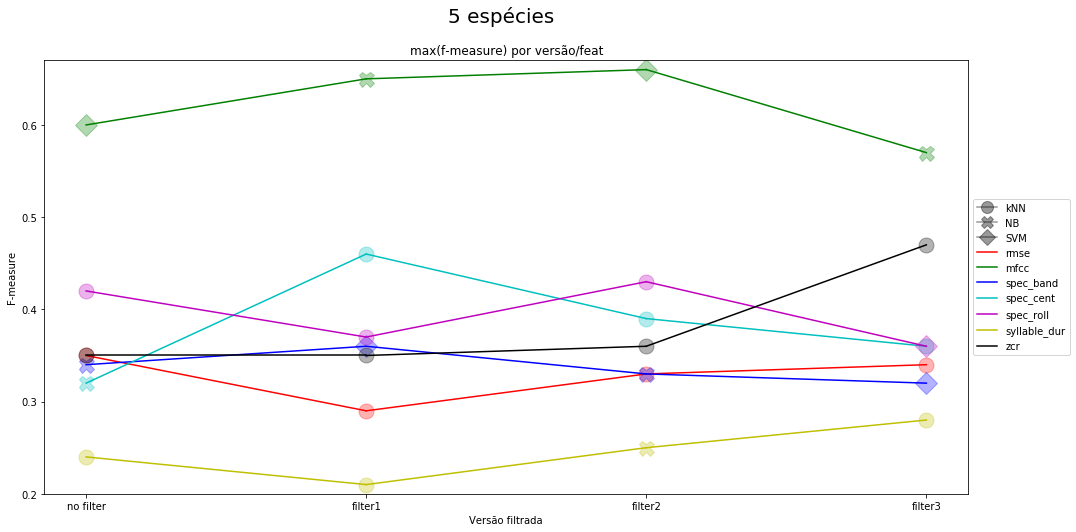

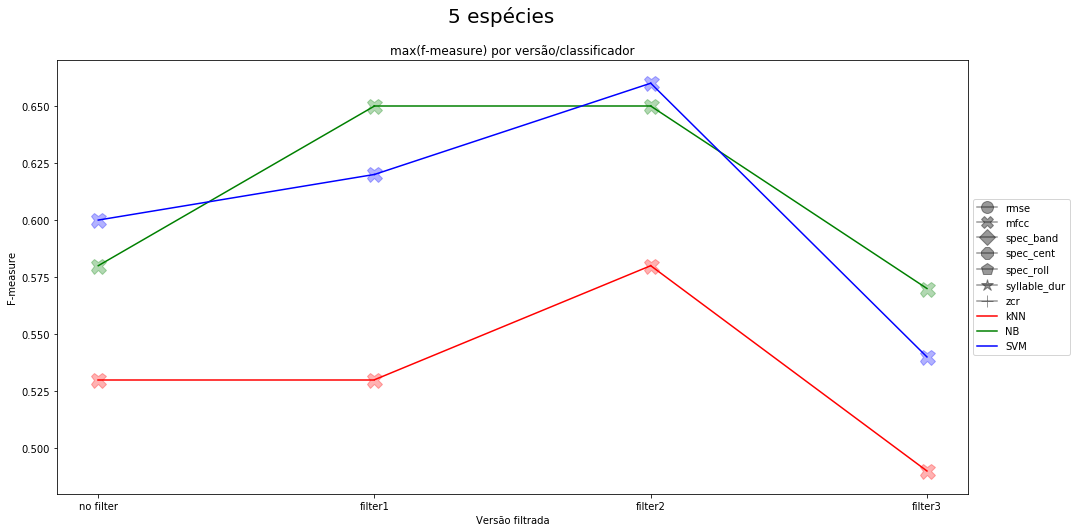

In [64]:
importlib.reload(my_plots)
all_data5 = my_plots.matrix_from_table('../experiments/hashes/5spc')

title = '5 espécies'

plot = my_plots.color_plot_data_f_c(all_data5,title)

pp = PdfPages(PICS_DIR + 'geral5c.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.color_plot_data_f_v(all_data5,title)

pp = PdfPages(PICS_DIR + 'geral5f.pdf')
pp.savefig(plot)
pp.close()

#plot = my_plots.line_plot_data(all_data3, 2, 2, title,['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

#pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
#pp.savefig(plot)
#pp.close()

plot = my_plots.line_plot_max(all_data5, title)

pp = PdfPages(PICS_DIR + '5maxvf.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.line_plot_max_v_c(all_data5, title)

pp = PdfPages(PICS_DIR + '5maxvc.pdf')
pp.savefig(plot)
pp.close()


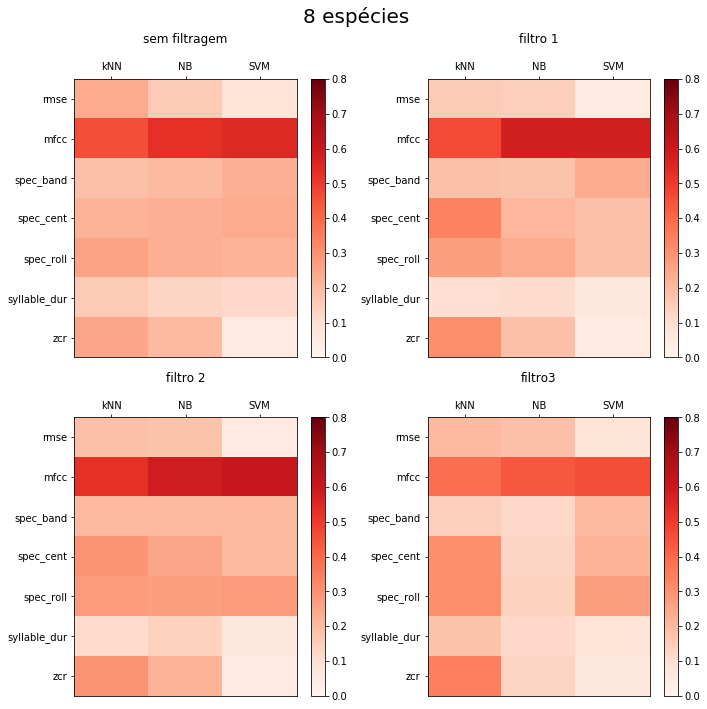

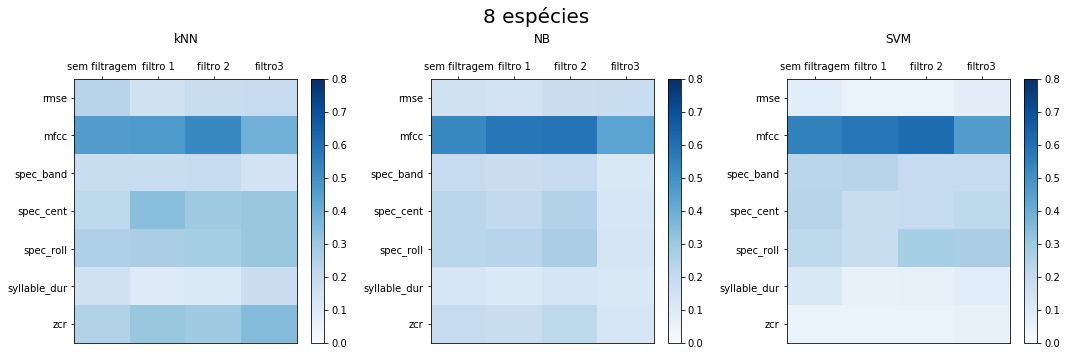

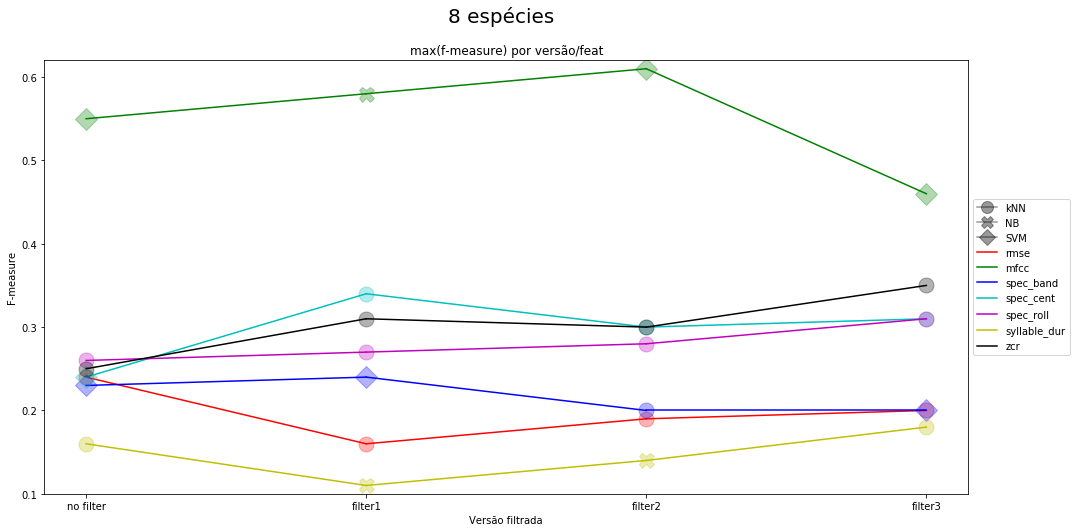

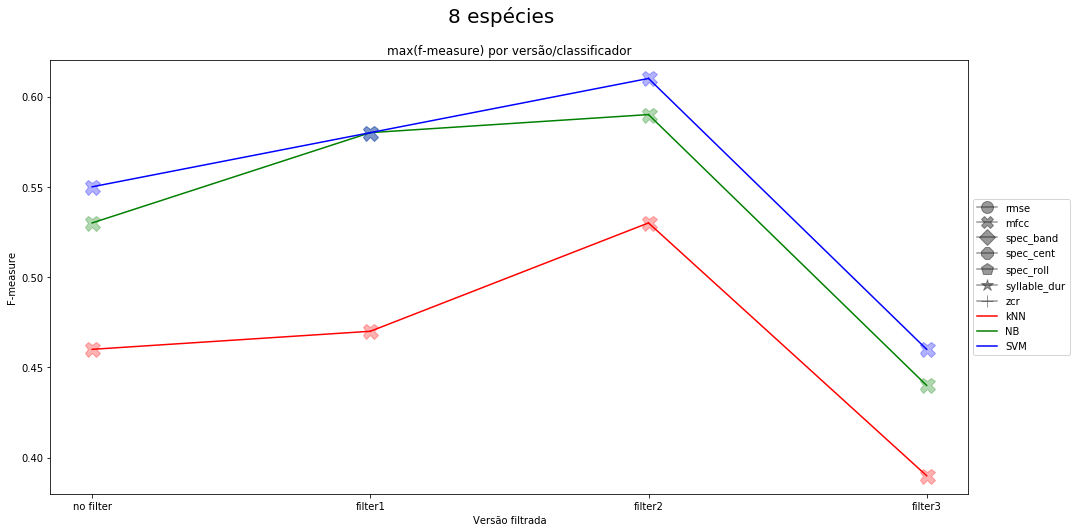

In [65]:
importlib.reload(my_plots)
all_data8 = my_plots.matrix_from_table('../experiments/hashes/8spc')
title = '8 espécies'

plot = my_plots.color_plot_data_f_c(all_data8,title)

pp = PdfPages(PICS_DIR + 'geral8c.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.color_plot_data_f_v(all_data8,title)

pp = PdfPages(PICS_DIR + 'geral8f.pdf')
pp.savefig(plot)
pp.close()

#plot = my_plots.line_plot_data(all_data3, 2, 2, title,['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

#pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
#pp.savefig(plot)
#pp.close()

plot = my_plots.line_plot_max(all_data8, title)

pp = PdfPages(PICS_DIR + '8maxvf.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.line_plot_max_v_c(all_data8, title)

pp = PdfPages(PICS_DIR + '8maxvc.pdf')
pp.savefig(plot)
pp.close()


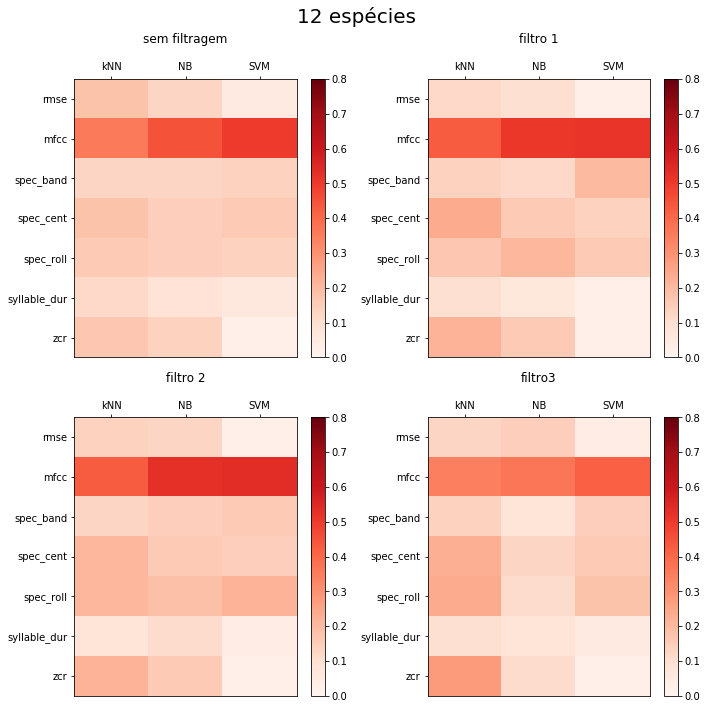

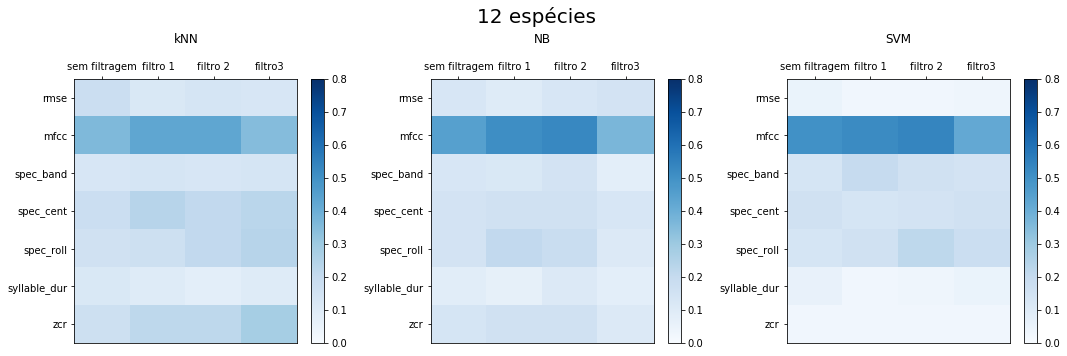

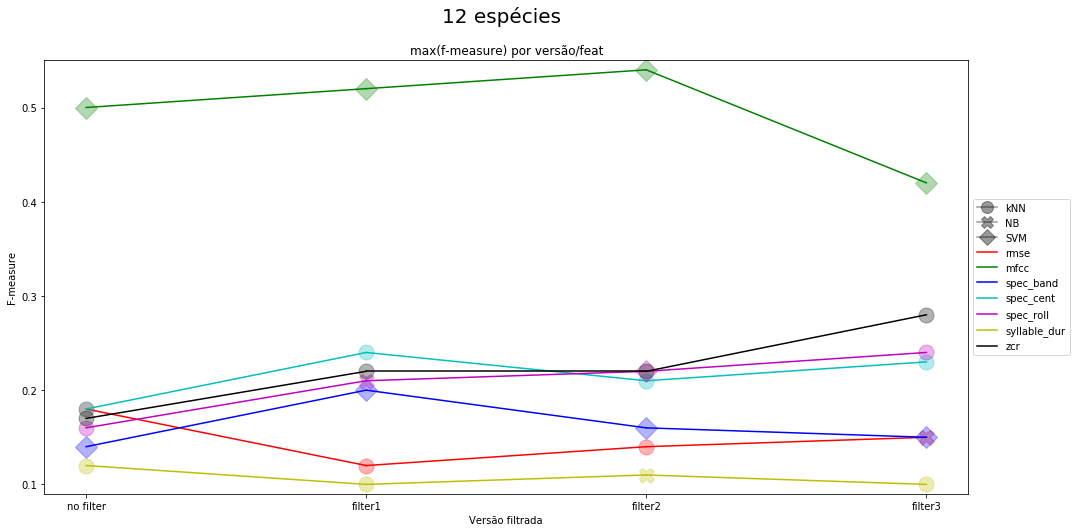

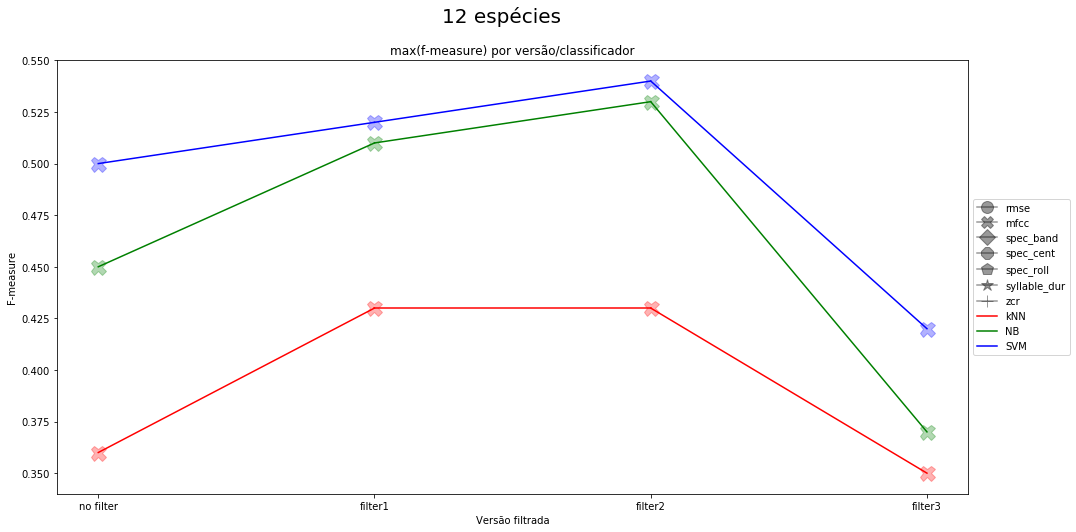

In [66]:
importlib.reload(my_plots)
all_data12 = my_plots.matrix_from_table('../experiments/hashes/12spc')
title = '12 espécies'

plot = my_plots.color_plot_data_f_c(all_data12,title)

pp = PdfPages(PICS_DIR + 'geral12c.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.color_plot_data_f_v(all_data12,title)

pp = PdfPages(PICS_DIR + 'geral12f.pdf')
pp.savefig(plot)
pp.close()

#plot = my_plots.line_plot_data(all_data3, 2, 2, title,['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

#pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
#pp.savefig(plot)
#pp.close()

plot = my_plots.line_plot_max(all_data12, title)

pp = PdfPages(PICS_DIR + '12maxvf.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.line_plot_max_v_c(all_data12, title)

pp = PdfPages(PICS_DIR + '12maxvc.pdf')
pp.savefig(plot)
pp.close()


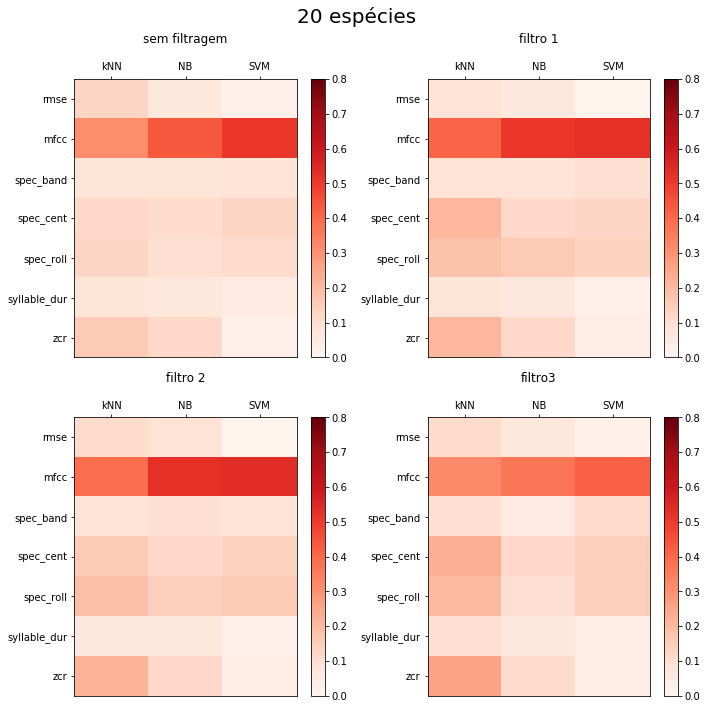

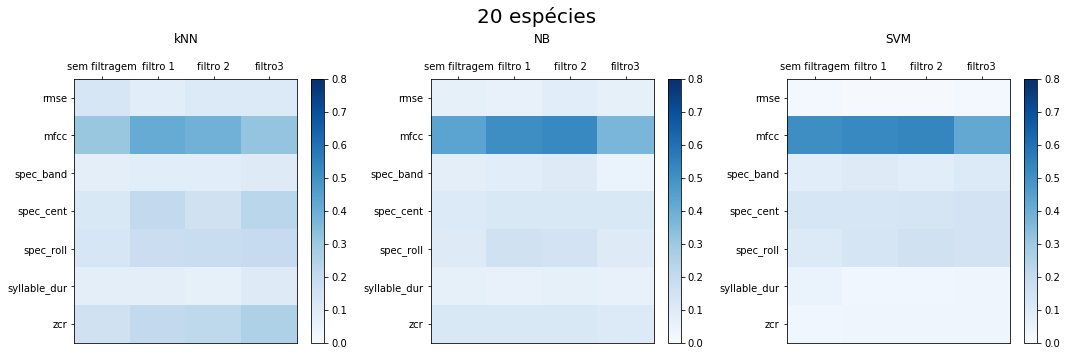

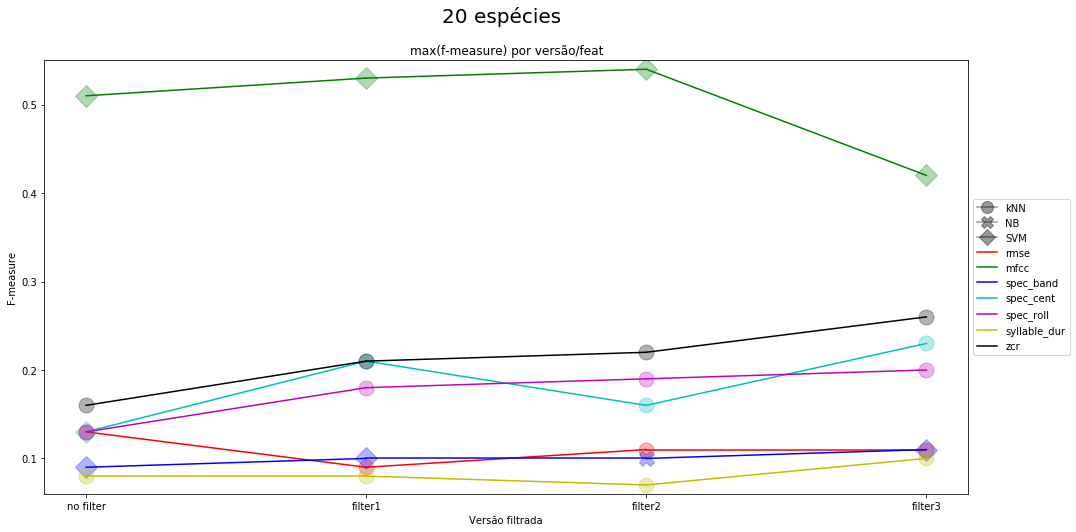

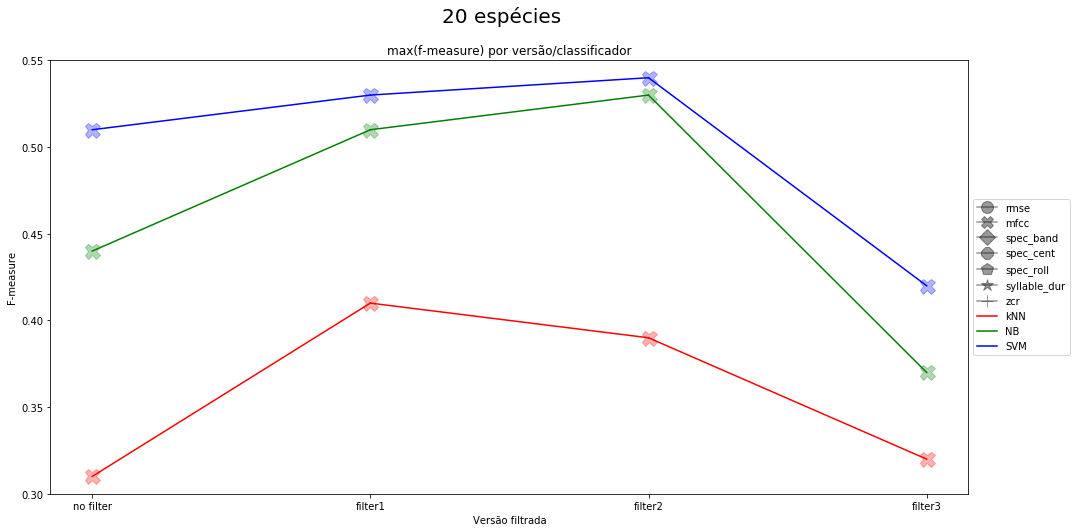

In [67]:
importlib.reload(my_plots)
all_data20 = my_plots.matrix_from_table('../experiments/hashes/20spc')
title = '20 espécies'

plot = my_plots.color_plot_data_f_c(all_data20,title)

pp = PdfPages(PICS_DIR + 'geral20c.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.color_plot_data_f_v(all_data20,title)

pp = PdfPages(PICS_DIR + 'geral20f.pdf')
pp.savefig(plot)
pp.close()

#plot = my_plots.line_plot_data(all_data3, 2, 2, title,['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

#pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
#pp.savefig(plot)
#pp.close()

plot = my_plots.line_plot_max(all_data20, title)

pp = PdfPages(PICS_DIR + '20maxvf.pdf')
pp.savefig(plot)
pp.close()

plot = my_plots.line_plot_max_v_c(all_data20, title)

pp = PdfPages(PICS_DIR + '20maxvc.pdf')
pp.savefig(plot)
pp.close()


0.74
0.66
0.61
0.54
0.54


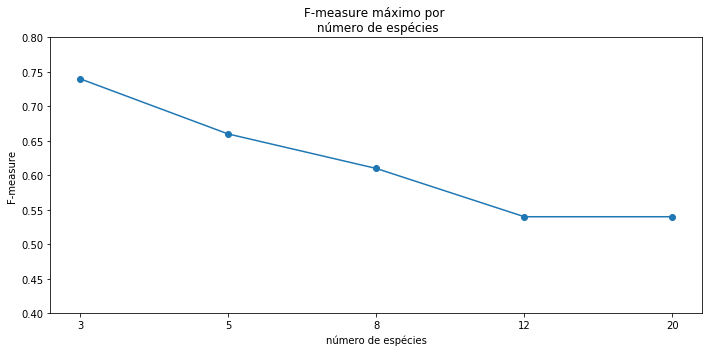

In [87]:
maxs = []
for d in [all_data3, all_data5, all_data8, all_data12, all_data20]:
    maxs.append(np.max(d))
    print(np.max(d))
maxs = np.array(maxs)
plt.figure(figsize=(10,5))
plt.title("F-measure máximo por \n número de espécies")
plt.ylim((0.4,0.8))
plt.ylabel("F-measure")
plt.xlabel("número de espécies")
plt.xticks(np.arange(5),['3', '5', '8', '12', '20'])
plt.plot(maxs,marker='o')
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'fmaxglobal.pdf')
pp.savefig(plot)
pp.close()


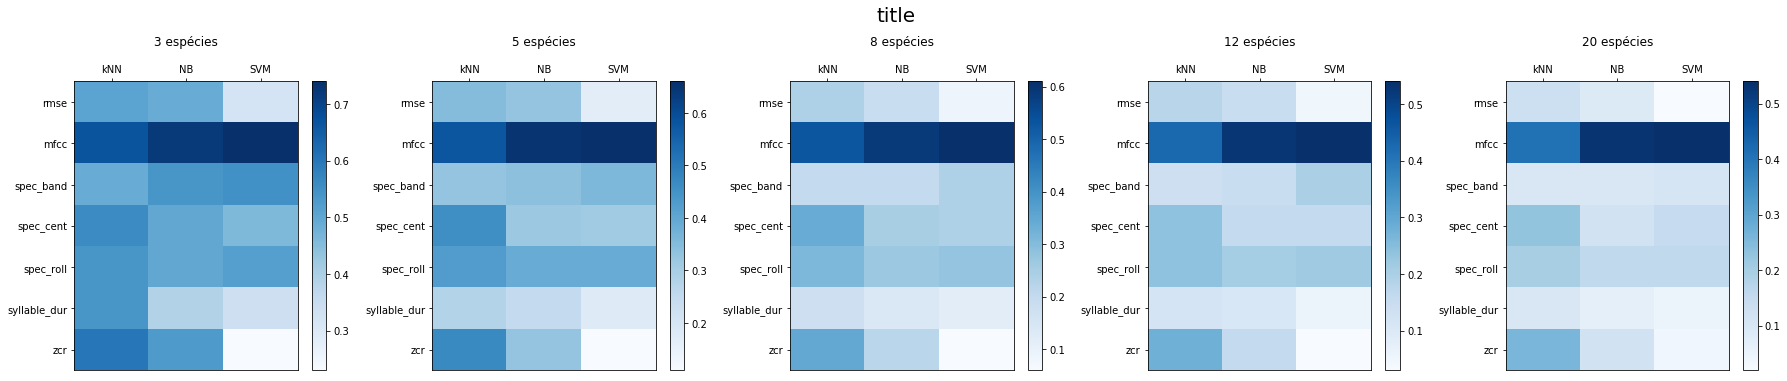

In [69]:
#print(all_data20)
#print(all_data20.T)
#print(np.max(all_data20,axis=0))
res = []
for d in [all_data3, all_data5, all_data8, all_data12, all_data20]:
    res.append(np.max(d, axis = 0))
res = np.array(res)
#print(res)

data_all = res
title_global = "title"
plt.figure(figsize=(25, 5))
plt.suptitle(title_global, fontsize = 20, y = 1.05)
n_lin = 1
n_col = 5
titles = ['sem filtragem', 'filtro 1', 'filtro 2', 'filtro3']
spcs = ['3 espécies', '5 espécies', '8 espécies', '12 espécies', '20 espécies']
for i in range(n_lin):
    for j in range(n_col):
        n_fig = i * n_col + (j + 1)
        data = data_all[n_fig -1 ]
        ax = plt.subplot(n_lin, n_col, n_fig)
        heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        ax.invert_yaxis()
        ax.xaxis.tick_top()

        ax.set_xticklabels(util.CLASSIFIERS, minor=False)
        ax.set_yticklabels(util.FEATURES_PLOT, minor=False)
        plt.colorbar(mappable=heatmap, ax=ax)
        plt.title("{}\n\n".format(spcs[n_fig - 1]))
plt.tight_layout()


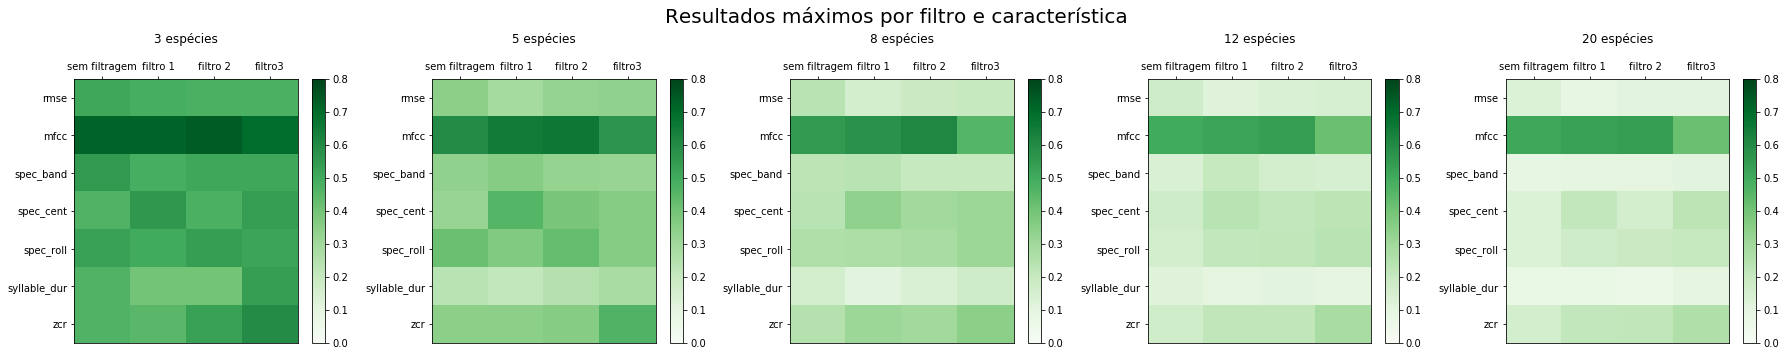

In [88]:
a = (all_data20)
#print(a.T)
c = np.max(a.T, axis=0)
#print(c)
maxs_v = []

for d in [all_data3, all_data5, all_data8, all_data12, all_data20]:
    maxs_v.append(np.max(d.T, axis = 0))
maxs_v = np.array(maxs_v)    

data_all = maxs_v
title_global = "Resultados máximos por filtro e característica"
plt.figure(figsize=(25, 5))
plt.suptitle(title_global, fontsize = 20)
n_lin = 1
n_col = 5
titles = ['sem filtragem', 'filtro 1', 'filtro 2', 'filtro3']
spcs = ['3 espécies', '5 espécies', '8 espécies', '12 espécies', '20 espécies']
for i in range(n_lin):
    for j in range(n_col):
        n_fig = i * n_col + (j + 1)
        data = data_all[n_fig -1 ]
        ax = plt.subplot(n_lin, n_col, n_fig)
        #heatmap = ax.pcolor(data, cmap=plt.cm.Greens)
        heatmap = ax.pcolor(data, cmap=plt.cm.Greens, vmin=0, vmax=0.8)

        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

        ax.invert_yaxis()
        ax.xaxis.tick_top()

        ax.set_xticklabels(titles, minor=False)
        ax.set_yticklabels(util.FEATURES_PLOT, minor=False)
        plt.colorbar(mappable=heatmap, ax=ax)
        plt.title("{}\n\n".format(spcs[n_fig - 1]))
plot = plt.tight_layout()
plt.subplots_adjust(top=0.78)

pp = PdfPages(PICS_DIR + 'geral_filtr_carac.pdf')
pp.savefig(plot)
pp.close()



In [90]:
def normalizedVar(Y):
    var_p = np.sqrt(Y.var(1))
    var_p = var_p.reshape(var_p.shape[0],1)
    return(var_p)


def varTrustFunc(Y, numFrames=200):
    x = int(Y.shape[1]/numFrames)
    varTrust = np.ones(Y.shape)
    for i in range(0, Y.shape[1], numFrames):
        indiceStart = i
        indiceStop = indiceStart+numFrames
        Y_p = Y[:,indiceStart:indiceStop]

        var_p = normalizedVar(Y_p)
        varTrust[:,indiceStart:indiceStop] = var_p
    varTrust = varTrust / np.max(varTrust)
    return(varTrust)


def expandContrast(contrast_p, shape, n_bands, deltaF):
    contrast = np.ones(shape)
    for i in range(0, n_bands+1):
        if i == 0:
            indiceStart = 0
        else:
            indiceStart = deltaF * 2**(i-1)
        indiceStop = deltaF * 2**i - 1
        contrast[indiceStart:indiceStop,:] = contrast_p[i,:]
    contrast[indiceStop+1:,:] = contrast_p[n_bands,:]
    return(contrast)


def contrastTrustFunc(Y, sr):
    n_bands = 8
    contrast_p = librosa.feature.spectral_contrast(S=Y, sr=sr, linear=True, n_bands=n_bands, fmin=64)
    deltaF = int(round(64/(sr/(2*Y.shape[0]))))
    contrast = expandContrast(contrast_p, Y.shape, n_bands, deltaF)
    contrast /= np.max(contrast)
    return(contrast)


# In[17]:

def my_filter(y, sr):
    Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
    Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
    varTrust = varTrustFunc(Y_dB)
    contrast = contrastTrustFunc(np.abs(Y), sr)
    mask = np.multiply(contrast, varTrust)
    mask = mask / np.max(mask)
    mag, phase = librosa.magphase(Y)
    newmag = np.multiply(mag, mask)
    Y_rec = np.multiply(newmag, np.exp(np.multiply(phase, (1j))))
    y_rec = librosa.istft(Y_rec, hop_length=512)

    return y_rec


# In[18]:

def my_filter2(y, sr):
    Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
    Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
    varTrust = varTrustFunc(Y_dB)
    mask = varTrust
    mag, phase = librosa.magphase(Y)
    newmag = np.multiply(mag, mask)
    contrast = contrastTrustFunc(np.abs(newmag), sr)
    mask = contrast
    x = 0.2
    mask[mask < x] = x
    newnewmag = np.multiply(newmag, mask)
    Y_rec = np.multiply(newnewmag, np.exp(np.multiply(phase, (1j))))

    y_rec = librosa.istft(Y_rec, hop_length=512)

    return y_rec


# In[19]:

def my_filter3(y, sr):

    Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
    Y_dB = librosa.amplitude_to_db(Y, ref=np.max)

    varTrust = varTrustFunc(Y_dB)
    contrast = contrastTrustFunc(np.abs(Y), sr)

    mask = np.zeros(varTrust.shape)
    mask[np.logical_and(varTrust > 0.15, contrast > 0.2)] = 1

    mag, phase = librosa.magphase(Y)
    newmag = np.multiply(mag, mask)
    Y_rec = np.multiply(newmag, np.exp(np.multiply(phase, (1j))))

    y_rec = librosa.istft(Y_rec, hop_length=512)

    return y_rec


In [108]:
y, sr = librosa.load("48054_44k.wav", sr=44100)
y = y[44100*4:44100*8]


In [98]:
ys  = my_filter(y, sr)
ys1 = my_filter2(y, sr)
ys2 = my_filter3(y, sr)

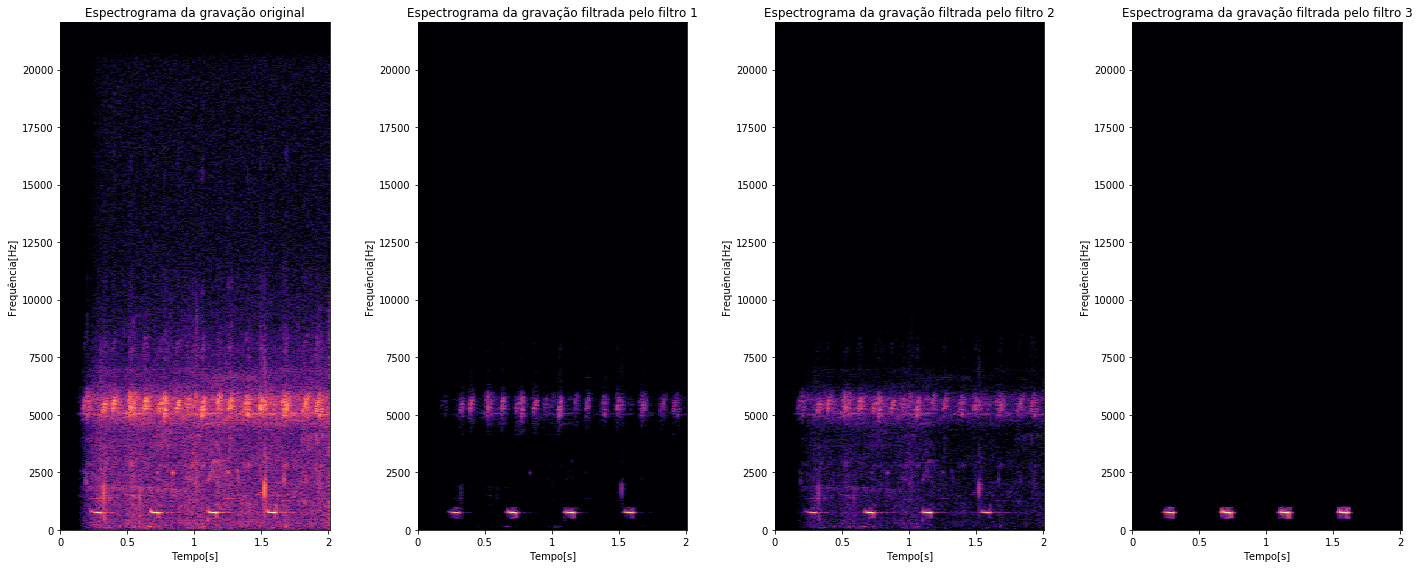

In [107]:
plt.figure(figsize=(20,8))

plt.subplot(1, 4, 1)
Ys = librosa.stft(y, n_fft = 4096)
librosa.display.specshow(librosa.amplitude_to_db(Ys, np.max),x_axis='time', y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Espectrograma da gravação original')

plt.subplot(1, 4, 2)
Ys = librosa.stft(ys, n_fft = 4096)
librosa.display.specshow(librosa.amplitude_to_db(Ys, np.max),x_axis='time', y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Espectrograma da gravação filtrada pelo filtro 1')

plt.subplot(1, 4, 3)
Ys = librosa.stft(ys1, n_fft = 4096)
librosa.display.specshow(librosa.amplitude_to_db(Ys, np.max),x_axis='time', y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Espectrograma da gravação filtrada pelo filtro 2')

plt.subplot(1, 4, 4)
Ys = librosa.stft(ys2, n_fft = 4096)
librosa.display.specshow(librosa.amplitude_to_db(Ys, np.max),x_axis='time', y_axis='linear', sr=sr, hop_length = 512)
#plt.colorbar(format='%+2.0f dB')
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Espectrograma da gravação filtrada pelo filtro 3')

plotff = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'filtros_example.pdf')
pp.savefig(plotff)
pp.close()



/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/librosa/feature/spectral.py:392: ComplexWarning: Casting complex values to real discards the imaginary part
  valley[k] = np.mean(sortedr[:idx], axis=0)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/librosa/feature/spectral.py:393: ComplexWarning: Casting complex values to real discards the imaginary part
  peak[k] = np.mean(sortedr[-idx:], axis=0)


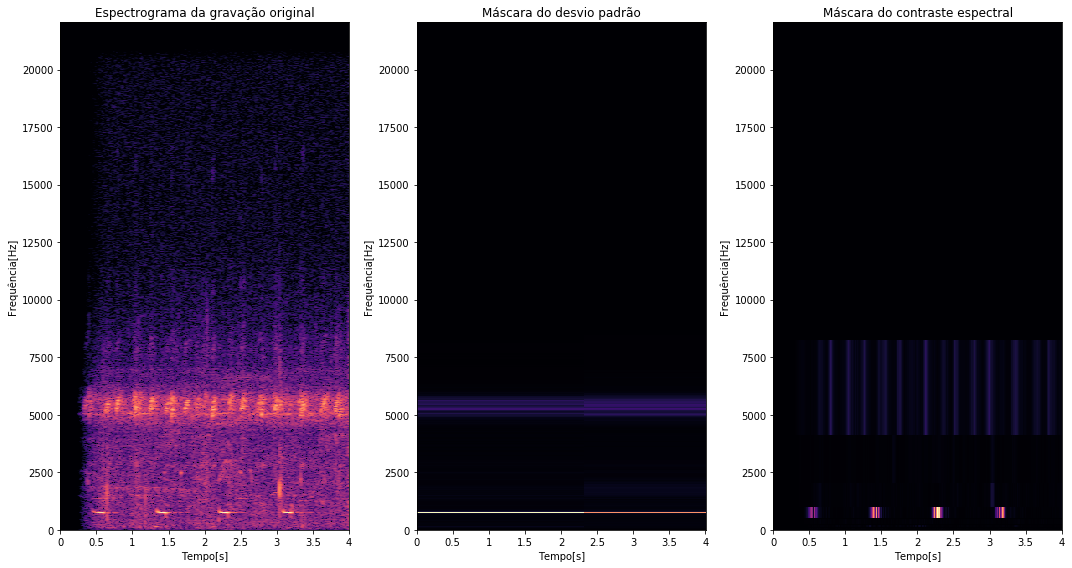

In [120]:
#plt.figure(figsize=(20,8))

Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
var_mask = varTrustFunc(Y)
con_mask = contrastTrustFunc(Y, sr)

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
librosa.display.specshow(librosa.amplitude_to_db(Y, np.max), x_axis='time', y_axis='linear', sr=sr)
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Espectrograma da gravação original')

plt.subplot(1,3,2)
librosa.display.specshow(var_mask, x_axis='time', y_axis='linear', sr=sr)
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Máscara do desvio padrão')

plt.subplot(1,3,3)
librosa.display.specshow(con_mask, x_axis='time', y_axis='linear', sr=sr)
plt.ylabel("Frequência[Hz]")
plt.xlabel("Tempo[s]")
plt.title('Máscara do contraste espectral')

plotm = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'masks_example.pdf')
pp.savefig(plotm)
pp.close()



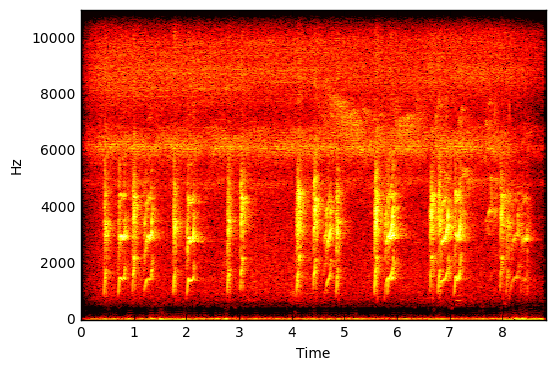

In [25]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'hot')


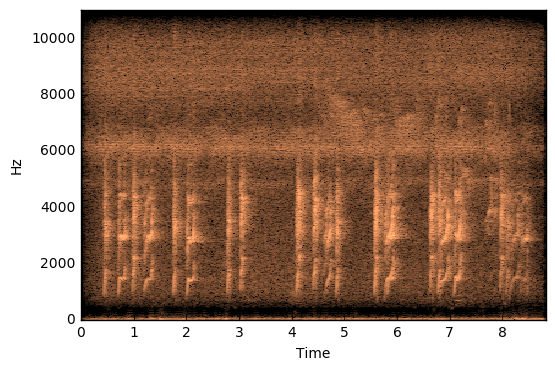

In [28]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'copper')


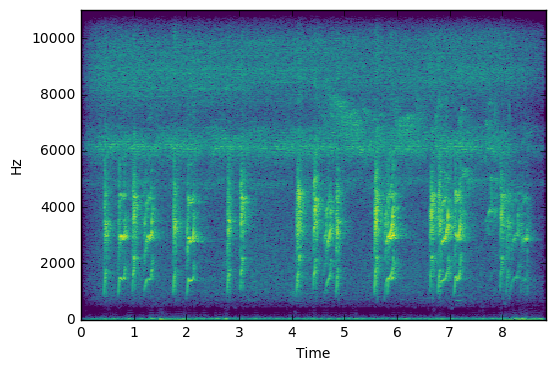

In [30]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'viridis')


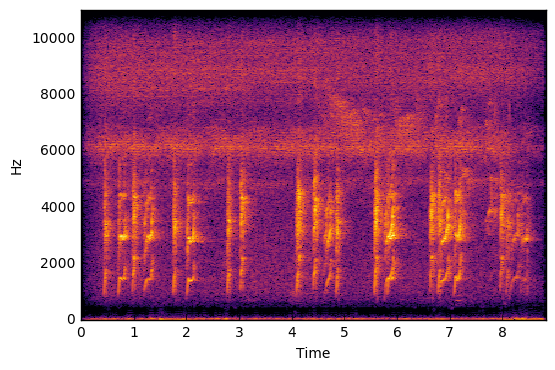

In [35]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
